# PROJECT : LICENSE PLATE RECOGNITION

## Stage 1: Data Preprocessing and Exploration

### step 1: Importing the required libraries
##### Summary: Importing necessary libraries including OpenCV for image processing, NumPy for numerical operations, Pandas for data manipulation, Matplotlib for visualization, Scikit-learn for data splitting and preprocessing, and TensorFlow/Keras for building and training neural networks.

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Step 2: Define Paths for Data Directories

In [6]:
# Define paths for data directories
vehicle_images_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\license_plates_detection_train"
license_plate_images_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\license_plates_recognition_train"
vehicle_annotations_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\Licplatesdetection_train.csv"
plate_annotations_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\Licplatesrecognition_train.csv"

### Step 3: Loading Data
#### Summary: Load the annotations from CSV files for both vehicle detection and license plate recognition. Additionally, load the vehicle images and license plate images from their respective directories.

In [7]:
# Load the Data
# Load annotations
vehicle_annotations = pd.read_csv(vehicle_annotations_path)
plate_annotations = pd.read_csv(plate_annotations_path)

# Load vehicle images
vehicle_images = []
for filename in os.listdir(vehicle_images_path):
    img = cv2.imread(os.path.join(vehicle_images_path, filename))
    vehicle_images.append(img)

# Load license plate images
plate_images = []
for filename in os.listdir(license_plate_images_path):
    img = cv2.imread(os.path.join(license_plate_images_path, filename))
    plate_images.append(img)


### Step 4: Pre-processing Data
#### Summary: Resize the vehicle images and license plate images to a fixed size (e.g., 224x224) and normalize their pixel values to a range of [0, 1].### Step 4: Pre-processing Data

In [8]:
# Pre-processing
# Resize images
fixed_size = (224, 224)  # Adjust as needed
vehicle_images_resized = [cv2.resize(img, fixed_size) for img in vehicle_images]
plate_images_resized = [cv2.resize(img, fixed_size) for img in plate_images]

# Normalize pixel values
vehicle_images_normalized = np.array(vehicle_images_resized) / 255.0
plate_images_normalized = np.array(plate_images_resized) / 255.0

### Step 5: Data Exploration
#### Summary: Visualize samples of vehicle images with annotations (bounding boxes) and license plate images without annotations to gain insights into the dataset and verify the correctness of annotations.

Visualizing vehicle samples with annotations:


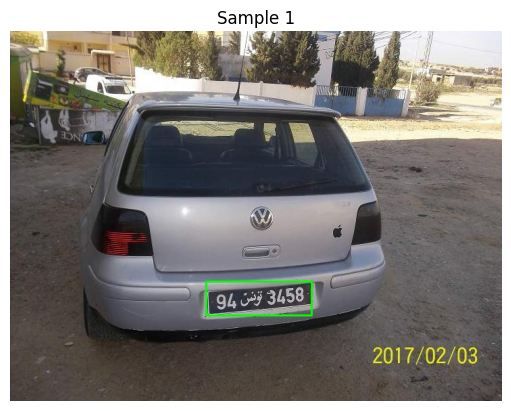

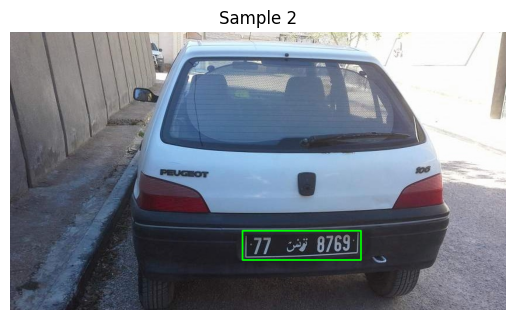

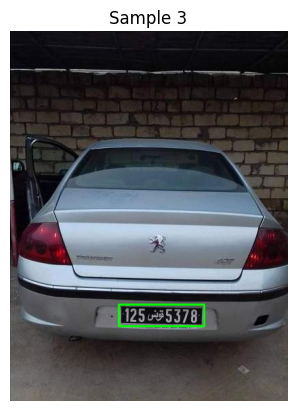

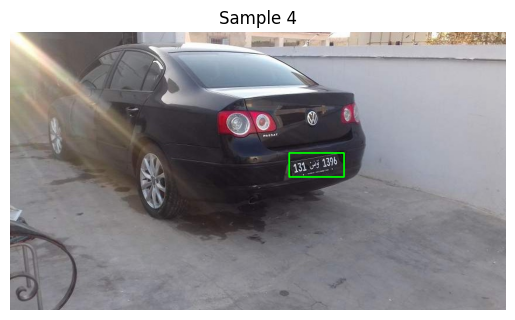

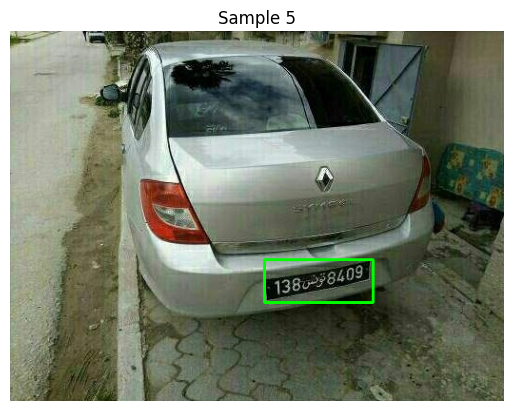

Visualizing license plate samples without annotations:


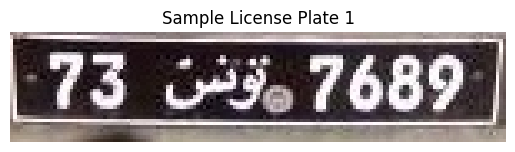

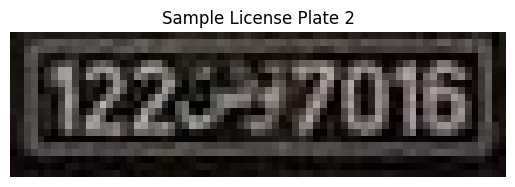

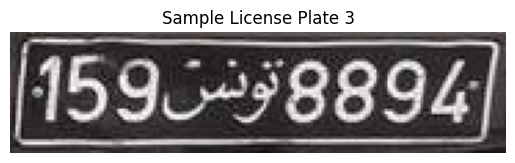

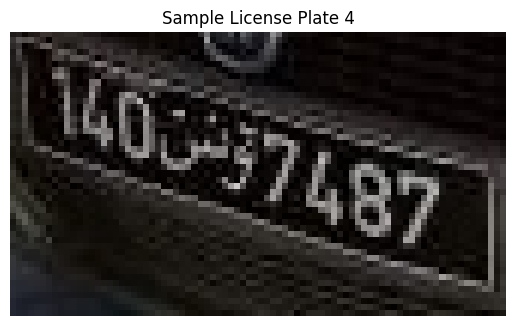

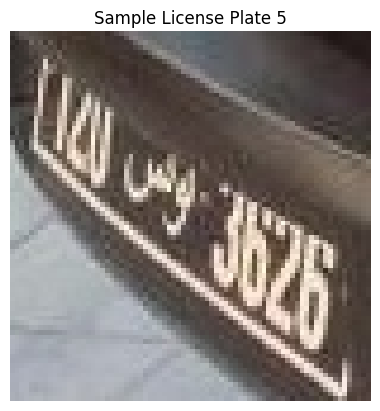

In [9]:
# Data Exploration
def visualize_vehicle_samples(images, annotations):
    for i in range(5):
        idx = np.random.randint(len(images))
        img = images[idx]
        annotation = annotations.iloc[idx]
        xmin, ymin, xmax, ymax = annotation['xmin'], annotation['ymin'], annotation['xmax'], annotation['ymax']
        img_copy = img.copy()
        cv2.rectangle(img_copy, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
        plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
        plt.title(f'Sample {i+1}')
        plt.axis('off')
        plt.show()

def visualize_plate_samples(images):
    for i in range(5):
        idx = np.random.randint(len(images))
        img = images[idx]
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f'Sample License Plate {i+1}')
        plt.axis('off')
        plt.show()

# Visualize vehicle images with annotations
print("Visualizing vehicle samples with annotations:")
visualize_vehicle_samples(vehicle_images, vehicle_annotations)

# Visualize license plate images without annotations
print("Visualizing license plate samples without annotations:")
visualize_plate_samples(plate_images)

## Stage 2: Model Building

### Step 1 - Model Building for License Plate Detection
#### Summary:This section outlines the process of defining and compiling a Sequential model designed for license plate detection. The model architecture comprises convolutional layers followed by max-pooling operations, and fully connected layers. The output layer predicts the bounding box coordinates of the license plates. The model is compiled using the Adam optimizer and Mean Squared Error (MSE) loss function. The pre-processed vehicle images and their corresponding bounding box annotations are split into training and testing sets using the train_test_split function. Subsequently, the detection model (detection_model) undergoes training on the training data (X_train, y_train) for 20 epochs, with a batch size of 32. A validation split of 0.2 is employed to monitor validation loss and accuracy during training.After training, the trained license plate detection model is evaluated using the test data (X_test, y_test) to assess its performance. Loss and accuracy metrics are calculated and printed. Additionally, the training history is visualized by plotting the training and validation loss curves across epochs.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split

# Model Building
detection_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4)  # Output layer for bounding box coordinates
])

detection_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

c:\python3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Prepare Data for Training
X_train, X_test, y_train, y_test = train_test_split(vehicle_images_normalized, vehicle_annotations[['xmin', 'ymin', 'xmax', 'ymax']].values, test_size=0.2, random_state=42)

In [12]:
# Model Training
history = detection_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.1147 - loss: 69373.7266 - val_accuracy: 0.5000 - val_loss: 21010.6660
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 934ms/step - accuracy: 0.4665 - loss: 19549.1797 - val_accuracy: 0.5069 - val_loss: 17260.0156
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 984ms/step - accuracy: 0.4873 - loss: 14929.4160 - val_accuracy: 0.5000 - val_loss: 15460.8330
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 18s 981ms/step - accuracy: 0.4920 - loss: 13642.9336 - val_accuracy: 0.5000 - val_loss: 14915.3350
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 936ms/step - accuracy: 0.5250 - loss: 13332.5059 - val_accuracy: 0.4931 - val_loss: 15868.0957
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 900ms/step - accuracy: 0.5399 - loss: 13536.1680 - val_accuracy: 0.5139 - val_loss: 14161.1035
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 17s 926ms/step - accuracy: 0.5450 - loss: 12216.4346 - val_accuracy: 0.4792 - val_loss: 13920.8564
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 91

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.7536 - loss: 7774.2183
Test Loss: 8361.267578125
Test Accuracy: 0.7388888597488403


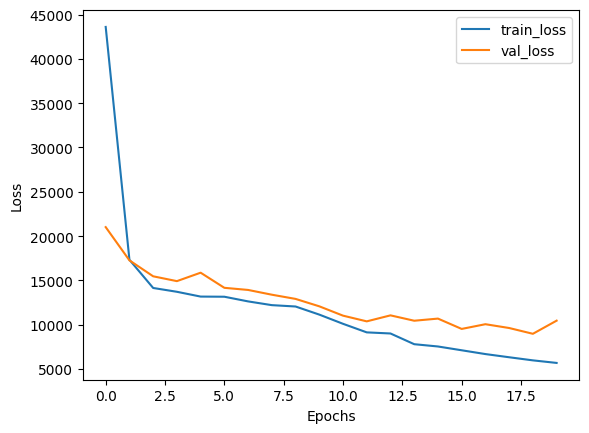

In [13]:
# Model Evaluation
loss, accuracy = detection_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Step 2- Model Building for License Plate Recognition(License Plate Character Recognition)

#### Encode License Plate Characters: LabelEncoder is fitted on all unique characters present in the license plate annotations. Text sequences are transformed into sequences of integers and padded to ensure uniform length.

#### Model Building- for Character RecognitionThe character recognition model comprises convolutional layers, max-pooling, flattening, and repeating vectors to match the maximum sequence length. An LSTM layer with reduced units processes sequences, followed by a TimeDistributed dense layer with softmax activation for character classification. The model is compiled with the Adam optimizer and categorical crossentropy loss.

#### Model Training- Pre-processed license plate images and encoded character sequences are split into training and testing sets using train_test_split. The recognition model is trained on the training data for 20 epochs with a batch size of 32 and a validation split of 0.2.

#### Model Evaluation-The trained character recognition model is evaluated on the test data to assess its performance. Loss and accuracy metrics are calculated and printed. Additionally, the training history is visualized by plotting the training and validation loss curves across epochs.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, TimeDistributed, Dense, RepeatVector
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# Encode License Plate Characters
# Fit LabelEncoder on all unique characters
all_chars = list(set("".join(plate_annotations['text'].values)))
label_encoder = LabelEncoder()
label_encoder.fit(all_chars)

# Transform text to sequences of integers
plate_annotations['encoded_text'] = plate_annotations['text'].apply(lambda x: label_encoder.transform(list(x)))
max_length = plate_annotations['encoded_text'].apply(len).max()
padded_sequences = np.zeros((plate_annotations.shape[0], max_length), dtype=int)

for i, seq in enumerate(plate_annotations['encoded_text']):
    padded_sequences[i, :len(seq)] = seq

# Convert to categorical
num_classes = len(label_encoder.classes_)
y = np.array([to_categorical(seq, num_classes=num_classes) for seq in padded_sequences])

In [15]:
# Model Building for Character Recognition
recognition_model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Reduced number of filters
    MaxPooling2D((2, 2)),
    Flatten(),
    RepeatVector(int(max_length)),  # Ensure max_length is a Python integer
    LSTM(64, return_sequences=True),  # Reduced number of units
    TimeDistributed(Dense(num_classes, activation='softmax'))
])

recognition_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\python3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(plate_images_normalized, y, test_size=0.2, random_state=42)


In [25]:
# Training
history = recognition_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.3891 - loss: 1.6086 - val_accuracy: 0.2717 - val_loss: 2.2676
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.4112 - loss: 1.5413 - val_accuracy: 0.2795 - val_loss: 2.2748
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.4417 - loss: 1.4818 - val_accuracy: 0.2908 - val_loss: 2.2858
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 224s 13s/step - accuracy: 0.4645 - loss: 1.4201 - val_accuracy: 0.2951 - val_loss: 2.2976
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.4787 - loss: 1.3800 - val_accuracy: 0.3056 - val_loss: 2.2883
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 89s 5s/step - accuracy: 0.4934 - loss: 1.3365 - val_accuracy: 0.3038 - val_loss: 2.2893
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 91s 5s/step - accuracy: 0.5089 - loss: 1.2980 - val_accuracy: 0.3030 - val_loss: 2.2967
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 6s/step - accuracy: 0.5287 - loss: 1.2601 - val_accuracy: 0.3090 - val_l

6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.3185 - loss: 2.5195
Test Loss: 2.531367301940918
Test Accuracy: 0.3097222149372101


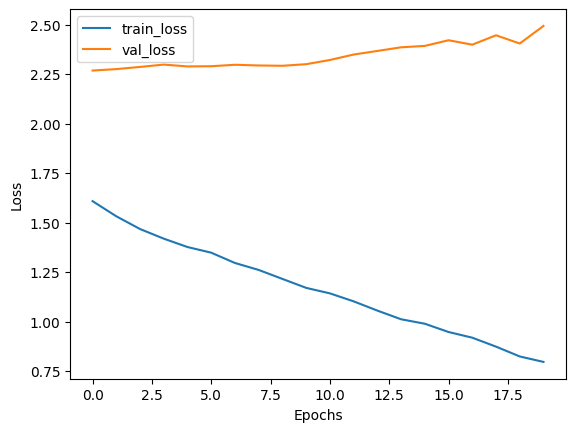

In [28]:
# Model Evaluation
loss, accuracy = recognition_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Plot the training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Stage 3: Integration and Testing Summary:
#### Bounding Box Validation: Ensures bounding box coordinates are within image bounds and validates bounding box area before resizing.
#### Handling Invalid Boxes: Implements handling for invalid bounding boxes by setting predicted text to an empty string to prevent processing errors.
#### Image Loading Check: Verifies correct image loading before processing to avoid errors from missing or corrupted files, ensuring smooth execution.

In [27]:
import os
import cv2
import numpy as np
import pandas as pd

# Define paths
test_images_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\test\test"
output_csv_path = r"C:\Users\Waseem\OneDrive\Desktop\licence_detec\test_submission_results.csv"

# Step 12: Detection and Recognition Function
def detect_and_recognize_plate(image):
    # Detection
    img_resized = cv2.resize(image, (224, 224)) / 255.0
    img_resized = np.expand_dims(img_resized, axis=0)
    bbox = detection_model.predict(img_resized)[0]
    
    # Extract the license plate from the image
    ymin, xmin, ymax, xmax = map(int, bbox)
    ymin = max(0, ymin)
    xmin = max(0, xmin)
    ymax = min(image.shape[0], ymax)
    xmax = min(image.shape[1], xmax)
    
    if ymin < ymax and xmin < xmax:  # Check if the bounding box is valid
        license_plate_img = image[ymin:ymax, xmin:xmax]
        license_plate_img_resized = cv2.resize(license_plate_img, (224, 224)) / 255.0
        license_plate_img_resized = np.expand_dims(license_plate_img_resized, axis=0)
        
        # Recognition
        predicted_sequence = recognition_model.predict(license_plate_img_resized)
        predicted_text = ''.join(label_encoder.inverse_transform(np.argmax(predicted_sequence, axis=-1)[0]))
    else:
        predicted_text = ""  # Set as empty if bounding box is invalid
    
    return predicted_text

# Prepare results
results = []

# Iterate over test images
for filename in os.listdir(test_images_path):
    if filename.endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(test_images_path, filename)
        image = cv2.imread(img_path)
        if image is None:
            continue  # Skip if image is not loaded
        
        recognized_text = detect_and_recognize_plate(image)
        
        # Convert recognized text to binary form
        binary_form = [0] * 10
        for char in recognized_text:
            if char.isdigit():
                binary_form[int(char)] = 1
        
        # Append result
        result = [filename] + binary_form
        results.append(result)

# Create DataFrame
columns = ['id'] + [str(i) for i in range(10)]
df_results = pd.DataFrame(results, columns=columns)

# Save to CSV
df_results.to_csv(output_csv_path, index=False)
print(f"Results saved to {output_csv_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
